In [52]:
import pandas as pd
import numpy as np
import itertools


import matplotlib.pyplot as plt
import scipy.stats

In [54]:
import seaborn as sns ;
sns.set ()
import matplotlib.pyplot as plt

In [55]:
# read data from csv
nobelDataDf = pd.read_csv("Nobel_N2.csv" )
nobelDataDf.head(-10)

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation
0,1901,chemistry,Jacobus Henricus van 't Hoff,30 August 1852,Rotterdam,the Netherlands,No Data,"Berlin University, Berlin, Germany","Physical chemistry, chemical kinetics",The Nobel Prize in Chemistry,The Nobel Prize in Chemistry 1901 was awarded ...
1,1901,literature,Sully Prudhomme,16 March 1839,Paris,France,France,No Data,French,The Nobel Prize in Literature,The Nobel Prize in Literature 1901 was awarded...
2,1901,medicine,Emil Adolf von Behring,15 March 1854,Hansdorf (now Jankowa ?aga?ska),Prussia (now Poland),No Data,"Marburg University, Marburg, Germany",No Data,The Nobel Prize in Physiology or Medicine,The Nobel Prize in Physiology or Medicine 1901...
3,1901,peace,Frédéric Passy,20 May 1822,Paris,France,France,Founder and President of first French peace s...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...
4,1901,peace,Jean Henry Dunant,8 May 1828,Geneva,Switzerland,Switzerland,Originator Geneva Convention (Convention de G...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...
...,...,...,...,...,...,...,...,...,...,...,...
824,2009,peace,Barack H. Obama,4-Aug-61,Honolulu HI,USA,USA,44th President of the United States of America,"World organizing, arms control and disarmament",The Nobel Peace Prize,The Nobel Peace Prize 2009 was awarded to Bara...
825,2009,physics,Charles K. Kao,4-Nov-33,Shanghai,China,No Data,"Standard Telecommunication Laboratories, Harl...","Fiber technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o..."
826,2009,physics,George E. Smith,10-May-30,White Plains NY,USA,No Data,"Bell Laboratories, Murray Hill, NJ, USA","Semiconductor technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o..."
827,2009,physics,Willard S. Boyle,19-Aug-24,Amherst NS,Canada,No Data,"Bell Laboratories, Murray Hill, NJ, USA","Semiconductor technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o..."


In [56]:
# Extraire les différentes disciplines des prix Nobel dans un tableau
disciplines = nobelDataDf['Category'].unique()

# Extraire les noms uniques des pays dans un tableau
pays = nobelDataDf['County'].unique()

# Afficher la taille du tableau 'pays'
print(pays.shape)

# Afficher le type de données du tableau 'pays'
print(type(pays))

# Afficher les noms uniques des pays
print(pays)


(123,)
<class 'numpy.ndarray'>
['the Netherlands' 'France' 'Prussia (now Poland)' 'Switzerland'
 'Prussia (now Germany)' 'Schleswig (now Germany)' 'India' 'Sweden'
 'Norway' 'Faroe Islands' 'United Kingdom' 'Russian Empire (now Poland)'
 'Scotland' 'Spain' 'Russia' 'Belgium' 'Poland' 'Germany'
 'Austrian Empire (now Czech Republic)' 'Hungary (now Slovakia)'
 'Tuscany (now Italy)' 'Italy' 'USA' 'Bavaria (now Germany)'
 'British India' 'Austrian Empire (now Italy)' 'New Zealand'
 'East Friesland (now Germany)' 'Russian Empire (now Ukraine)' 'Denmark'
 'Luxembourg' 'Russian Empire' 'Hesse-Kassel (now Germany)'
 'Germany (now Russia)' 'Mecklenburg (now Germany)' 'Austria'
 'Prussia (now Russia)' 'Australia' 'Austria-Hungary (now Slovenia)'
 'Ireland' 'Canada' 'Dutch East Indies (now Indonesia)'
 'Austrian Empire (now Austria)' 'Germany (now Poland)'
 'Württemberg (now Germany)' 'Argentina' 'Austria-Hungary (now Hungary)'
 'Austria-Hungary' 'Switzerland.' 'Austria-Hungary (now Croatia)'
 'R

In [57]:
# Convertir le tableau des noms uniques des pays en une liste
pays = pays.tolist()


In [58]:
disciplines=disciplines.tolist()

In [59]:
##### turn to numpy array
nobelData = nobelDataDf.to_numpy()
nobelData[1:2,:]
type(nobelData)

numpy.ndarray

AFC permet d’étuder un lien entre différentes modalités de chaque vari-
able. Pour cela nous il vaut mieux travailler en terme de proportion.La pre-mère étape consiste à calculer la somme des effectifs du tableau de données puis diviser la matrice des effectifs par ce grand total.

In [60]:

nobelData = pd.crosstab(nobelDataDf['County'], nobelDataDf['Category'], margins=True, margins_name='Total')
nobelData

Category,chemistry,economics,literature,medicine,peace,physics,Total
County,,,,,,,
Algeria,0,0,1,0,0,1,2
Argentina,0,0,0,2,2,0,4
Australia,1,0,0,7,0,2,10
Austria,2,1,1,5,2,2,13
Austria-Hungary,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,1,0,1
West Germany,1,0,0,0,0,4,5
Württemberg (now Germany),0,0,0,1,0,0,1


In [61]:

# Créer une matrice de dimensions (124, 7) remplie de zéros
W = np.zeros((124, 7))

# Initialiser l'indice i à 0 pour parcourir les lignes du DataFrame
i = 0

# Parcourir chaque ligne du DataFrame nobelData
for index, row in nobelData.iterrows():
    # Initialiser l'indice j à 0 pour parcourir les colonnes de chaque ligne
    j = 0
    
    # Calculer la somme des valeurs de la ligne actuelle
    Ki = row.sum()
    
    # Parcourir chaque colonne et sa valeur dans la ligne actuelle
    for column, value in row.items():
        # Calculer la somme des valeurs de la dernière colonne (indice -1) du DataFrame
        Kj = nobelData.iloc[i, -1]
        
        # Calculer et assigner la valeur à l'élément correspondant dans la matrice W
        W[i, j] = value / (839 * Ki * Kj)
        
        # Incrémenter l'indice j pour passer à la prochaine colonne
        j = j + 1
    
    # Incrémenter l'indice i pour passer à la prochaine ligne
    i = i + 1

# Afficher la matrice W
print(W)



[[0.00000000e+00 0.00000000e+00 1.48986889e-04 0.00000000e+00
  0.00000000e+00 1.48986889e-04 2.97973778e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.44934446e-05
  7.44934446e-05 0.00000000e+00 1.48986889e-04]
 [5.95947557e-06 0.00000000e+00 0.00000000e+00 4.17163290e-05
  0.00000000e+00 1.19189511e-05 5.95947557e-05]
 [7.05263381e-06 3.52631690e-06 3.52631690e-06 1.76315845e-05
  7.05263381e-06 7.05263381e-06 4.58421197e-05]
 [1.48986889e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.48986889e-04 2.97973778e-04]
 [5.95947557e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.95947557e-04]
 [5.95947557e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.95947557e-04]
 [0.00000000e+00 0.00000000e+00 6.62163952e-05 1.32432790e-04
  0.00000000e+00 0.00000000e+00 1.98649186e-04]
 [1.48986889e-04 0.00000000e+00 0.00000000e+00 1.48986889e-04
  0.00000000e+00 0.00000000e+00 2.97973778e-04]
 [0.000000

In [62]:
# total of all nobel prizes
Data = np.array(nobelData)
grandTotal = np.sum(Data[0:123,0:6])
print(grandTotal)
Data=Data[0:123,0:6]

839


In [63]:
# total of all nobel prizes
# we will work with proportions
correspondenceMatrix = np.divide(Data , grandTotal )
print(correspondenceMatrix.shape)
correspondenceMatrix


(123, 6)


array([[0.        , 0.        , 0.0011919 , 0.        , 0.        ,
        0.0011919 ],
       [0.        , 0.        , 0.        , 0.00238379, 0.00238379,
        0.        ],
       [0.0011919 , 0.        , 0.        , 0.00834327, 0.        ,
        0.00238379],
       [0.00238379, 0.0011919 , 0.0011919 , 0.00595948, 0.00238379,
        0.00238379],
       [0.0011919 , 0.        , 0.        , 0.        , 0.        ,
        0.0011919 ],
       [0.0011919 , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.0011919 , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0011919 , 0.00238379, 0.        ,
        0.        ],
       [0.0011919 , 0.        , 0.        , 0.0011919 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0011919 ],
       [0.0011919 , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0

Créer une matrice d’indépendance Analyser les relation les relations entre variables et modalités revient à constater un écart a une situation d’uniformité. Cette situation d’unifromité (cas
d’indépendance des variables) est exprimée par la matrice d’indépendance
qui se calcul simplement avec le produit de la somme marginale des lignes
(vecteur colonne) par la somme marginale de colonnes (vecteur ligne).

In [64]:
# row and column marginal totals
# axis =0 veut dire somme en iterant sur l ’ axe 0
rowTotals = np.sum(correspondenceMatrix , axis =1)
columnTotals = np.sum(correspondenceMatrix , axis =0)

# Independence matrix
independenceModel = np.outer ( rowTotals , columnTotals )

In [65]:
#Calculer le Khi-2 statistique
#Afin de voir si il y’a bien une distribution dependante des modalites

chiSquaredStatistic = grandTotal * np.sum ( np . square (
correspondenceMatrix - independenceModel ) / independenceModel )
print (" Chi -2 statistique calcul manuel ")
print( chiSquaredStatistic )

 Chi -2 statistique calcul manuel 
781.0534259656201


In [66]:
from scipy.stats import chi2_contingency


In [67]:
independenceModel

array([[4.54596468e-04, 1.90362271e-04, 3.04011388e-04, 5.56880673e-04,
        3.40947351e-04, 5.36992077e-04],
       [9.09192935e-04, 3.80724542e-04, 6.08022775e-04, 1.11376135e-03,
        6.81894701e-04, 1.07398415e-03],
       [2.27298234e-03, 9.51811354e-04, 1.52005694e-03, 2.78440336e-03,
        1.70473675e-03, 2.68496039e-03],
       [2.95487704e-03, 1.23735476e-03, 1.97607402e-03, 3.61972437e-03,
        2.21615778e-03, 3.49044850e-03],
       [4.54596468e-04, 1.90362271e-04, 3.04011388e-04, 5.56880673e-04,
        3.40947351e-04, 5.36992077e-04],
       [2.27298234e-04, 9.51811354e-05, 1.52005694e-04, 2.78440336e-04,
        1.70473675e-04, 2.68496039e-04],
       [2.27298234e-04, 9.51811354e-05, 1.52005694e-04, 2.78440336e-04,
        1.70473675e-04, 2.68496039e-04],
       [6.81894701e-04, 2.85543406e-04, 4.56017081e-04, 8.35321009e-04,
        5.11421026e-04, 8.05488116e-04],
       [4.54596468e-04, 1.90362271e-04, 3.04011388e-04, 5.56880673e-04,
        3.40947351e-04, 

# Question

Appliquer le test d'indépendance avec la fonction chi2-contingency
et décider si l'hypothèse d'indépendance est à rejetter ou non

Si la région de rejet est unilatérale du type t>c, alors pour une valeur t0 observée après expérience la P-valeur
est P(T >t0 |H0) si H0 est vraie.

In [68]:
chi2, p_value, _, _ = chi2_contingency(independenceModel)
alpha = 0.05 #similaire a l'intervale du confiance qu'on a etudier dans le premier semestre
if p_value < alpha:
    print("L'hypothèse nulle d'indépendance est rejetée.")
else:
    print("L'hypothèse nulle d'indépendance n'est pas rejetée.")

L'hypothèse nulle d'indépendance n'est pas rejetée.


# Question:
Définir la matrice de travail W à diagonaliser (telle qu'elle a été définie dans le cours pour )

In [69]:
W= np.zeros((124, 7))
Data=Data[0:123,0:6]
for i in range(123):
  for j in range(6):
    W[i][j]=Data[i][j]*(893*np.sqrt(rowTotals[i]*columnTotals[j]))
print(W)



[[0.00000000e+00 0.00000000e+00 1.55702786e+01 0.00000000e+00
  0.00000000e+00 2.06935689e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96042908e+01
  4.66380209e+01 0.00000000e+00 0.00000000e+00]
 [4.25744934e+01 0.00000000e+00 0.00000000e+00 3.29849305e+02
  0.00000000e+00 9.25444536e+01 0.00000000e+00]
 [9.70847823e+01 3.14122160e+01 3.96965773e+01 2.68632908e+02
  8.40778878e+01 1.05516912e+02 0.00000000e+00]
 [1.90398923e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.06935689e+01 0.00000000e+00]
 [1.34632370e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.34632370e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.90696189e+01 5.16188300e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.90398923e+01 0.00000000e+00 0.00000000e+00 2.10732991e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.000000

Décomposition en valeurs singulères (SVD)
La décomposition en valeurs singulères fait la même chose que la diagonalisation mais elle s’applique aux matrices non carées. l’application de SVD à notre matrice d’écart à l’indépendance (standardizedResiduals) retourne les
éléments suivants :
• u : matrice des vecteurs propres pour les lignes (rows)
• v : matrice des vecteurs propres pour les colonnes (columns)
• s : matrice des valeurs propres correspondants


In [70]:
# singular value decomposition ( SVD )
u ,s , v = np . linalg . svd ( W , full_matrices = False )

# Question

Quelle est la dimension de l'espace des vecteurs u ?
Quelle est la dimension l'espace des vecteurs v  ?
Quelle relation entre les valeurs singulières s et les valeurs propres pour l'AFC ?

In [71]:
#Diemnsion du U
print(u.shape)
print(v.shape)
#les valeurs singulières sont les racines carrées des valeurs propres de la matrice X^T * X 

(124, 7)
(7, 7)


# Donner le code nécéssaire qui permet de  déterminer

rowCoordinates  (Matrice Psi dans le cours )
et
colCoordinates (Matrice Phi dans le cours )

In [72]:
print(u .shape [0])

124


In [73]:
# compute rows and colomns coordinates
# s : matrice des valeurs propres

ScaledRows = np.zeros((u.shape [0],u.shape[1]))
for i in range (u .shape [0]-1) :
   ScaledRows[i] = np.divide ( u [ i ] ,np . sqrt(rowTotals[i]))

ScaledCols = np.zeros ((v.shape[0],v.shape[1]))
for i in range (v.shape [0]-1) :
   ScaledCols[i] = np .divide(v[ i ] , np.sqrt(columnTotals[i]))

# compute rows and colomns coordinates
rowCoordinates = np.dot( ScaledRows , np.diag (s))
rowCoordinates=rowCoordinates[:123,:6]
colCoordinates = np.dot( ScaledCols , np.diag (s))
colCoordinates=colCoordinates[:6,:123]

print(colCoordinates.shape)


(6, 7)


In [74]:
dfFirstTwoComponentsC = pd.DataFrame ( colCoordinates[:,0:2] , columns =[ 'Factorial_axis_1' , 'Factorial_axis_2'] , index = disciplines  )
dfFirstTwoComponentsR = pd.DataFrame( rowCoordinates[:,0:2] , columns =[ 'Factorial_axis_1' , 'Factorial_axis_2'] , index = pays )
dfFirstTwoComponents = dfFirstTwoComponentsR.append(dfFirstTwoComponentsC )

AttributeError: 'DataFrame' object has no attribute 'append'

Préparation du graphique
A présent nous allons tout mettre dans des dataframe Pandas puis nous
allons déssiner les points dans le graphes ainsi que leurs labels grace à pyplot
scatter

In [75]:
type(colCoordinates[:,0:2])

numpy.ndarray

In [76]:
# turn to dataframe , that would be easy to plot the result
dfFirstTwoComponentsC = pd.DataFrame ( data =[ l[0:2] for l in colCoordinates] , columns =[ ' Factorial_axis_1 ' , 'Factorial_axis_2 '] , index = disciplines )

dfFirstTwoComponentsR = pd.DataFrame( data =[ l[0:2] for l in rowCoordinates ] , columns =[ ' Factorial_axis_1 ' , 'Factorial_axis_2 '] , index = pays )

dfFirstTwoComponents = dfFirstTwoComponentsR.append (dfFirstTwoComponentsC )

AttributeError: 'DataFrame' object has no attribute 'append'

In [77]:
# ccete ccellule est une autre manière d'écrire la cellule préccédente
dfFirstTwoComponentsC = pd.DataFrame ( colCoordinates[:,0:2] , columns =[ 'Factorial_axis_1' , 'Factorial_axis_2'],index = disciplines )

dfFirstTwoComponentsR = pd.DataFrame( rowCoordinates[:,0:2] , columns =[ 'Factorial_axis_1' , 'Factorial_axis_2'],index = pays )

#dfFirstTwoComponents = dfFirstTwoComponentsR.append (dfFirstTwoComponentsC )

dfFirstTwoComponents=pd.concat([dfFirstTwoComponentsR,dfFirstTwoComponentsC])


In [78]:
# One list with all labels
points = pays + disciplines
points

['the Netherlands',
 'France',
 'Prussia (now Poland)',
 'Switzerland',
 'Prussia (now Germany)',
 'Schleswig (now Germany)',
 'India',
 'Sweden',
 'Norway',
 'Faroe Islands',
 'United Kingdom',
 'Russian Empire (now Poland)',
 'Scotland',
 'Spain',
 'Russia',
 'Belgium',
 'Poland',
 'Germany',
 'Austrian Empire (now Czech Republic)',
 'Hungary (now Slovakia)',
 'Tuscany (now Italy)',
 'Italy',
 'USA',
 'Bavaria (now Germany)',
 'British India',
 'Austrian Empire (now Italy)',
 'New Zealand',
 'East Friesland (now Germany)',
 'Russian Empire (now Ukraine)',
 'Denmark',
 'Luxembourg',
 'Russian Empire',
 'Hesse-Kassel (now Germany)',
 'Germany (now Russia)',
 'Mecklenburg (now Germany)',
 'Austria',
 'Prussia (now Russia)',
 'Australia',
 'Austria-Hungary (now Slovenia)',
 'Ireland',
 'Canada',
 'Dutch East Indies (now Indonesia)',
 'Austrian Empire (now Austria)',
 'Germany (now Poland)',
 'Württemberg (now Germany)',
 'Argentina',
 'Austria-Hungary (now Hungary)',
 'Austria-Hungary',


In [79]:
dfFirstTwoComponents['Factorial_axis_1'][10]

C:\Users\merye\AppData\Local\Temp\ipykernel_5456\3492134782.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfFirstTwoComponents['Factorial_axis_1'][10]


-165.0245081367069

In [80]:

print(type(dfFirstTwoComponents))


<class 'pandas.core.frame.DataFrame'>


C:\Users\merye\AppData\Local\Temp\ipykernel_5456\469419708.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax_kwargs.annotate (txt, (dfFirstTwoComponents['Factorial_axis_1'][i] , dfFirstTwoComponents['Factorial_axis_2' ][i]), horizontalalignment = 'center' , verticalalignment = 'center', size =7)


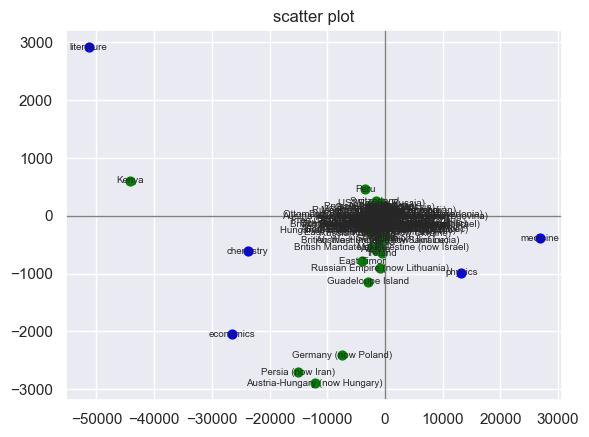

In [81]:
# plot the points
fig,ax_kwargs = plt.subplots ()

plt.scatter ( dfFirstTwoComponentsR [ 'Factorial_axis_1'] ,
dfFirstTwoComponentsR ['Factorial_axis_2'] , s = 40 , c =  'green')

plt.scatter ( dfFirstTwoComponentsC [ 'Factorial_axis_1'] ,
dfFirstTwoComponentsC [ 'Factorial_axis_2'] , s = 40 , c ='blue' )

plt.title ('scatter plot')

ax_kwargs.axvline ( c = 'grey' , lw =1)
ax_kwargs.axhline ( c = 'grey' , lw =1)

for i , txt in enumerate (points):

     ax_kwargs.annotate (txt, (dfFirstTwoComponents['Factorial_axis_1'][i] , dfFirstTwoComponents['Factorial_axis_2' ][i]), horizontalalignment = 'center' , verticalalignment = 'center', size =7)

plt.show()

In [82]:
# procédure explicative de la boucle for ci dessus
for i , txt in enumerate (points):

     print(i, txt)


0 the Netherlands
1 France
2 Prussia (now Poland)
3 Switzerland
4 Prussia (now Germany)
5 Schleswig (now Germany)
6 India
7 Sweden
8 Norway
9 Faroe Islands
10 United Kingdom
11 Russian Empire (now Poland)
12 Scotland
13 Spain
14 Russia
15 Belgium
16 Poland
17 Germany
18 Austrian Empire (now Czech Republic)
19 Hungary (now Slovakia)
20 Tuscany (now Italy)
21 Italy
22 USA
23 Bavaria (now Germany)
24 British India
25 Austrian Empire (now Italy)
26 New Zealand
27 East Friesland (now Germany)
28 Russian Empire (now Ukraine)
29 Denmark
30 Luxembourg
31 Russian Empire
32 Hesse-Kassel (now Germany)
33 Germany (now Russia)
34 Mecklenburg (now Germany)
35 Austria
36 Prussia (now Russia)
37 Australia
38 Austria-Hungary (now Slovenia)
39 Ireland
40 Canada
41 Dutch East Indies (now Indonesia)
42 Austrian Empire (now Austria)
43 Germany (now Poland)
44 Württemberg (now Germany)
45 Argentina
46 Austria-Hungary (now Hungary)
47 Austria-Hungary
48 Switzerland.
49 Austria-Hungary (now Croatia)
50 Russia

# Question
Interpréter le graphique de projection et interpréter la relation entre les modalités des 2 variables

# Réponse :

En analysant le graphique, nous pouvons déceler une corrélation significative entre les variables pays et Prix Nobel. En examinant la corrélation post-projection entre ces variables, nous sommes en mesure d'évaluer les performances économiques d'un pays en termes de Prix Nobel. Prenons l'exemple deLithuaniaa : sa projection est étroitement liée au nombre de Prix Nobel en sciences économiques, ce qui s'explique par le grand nombre de Prix Nobel dans ce domaine attribués à ce pays. En revanche, la projection deLithuaniaa est éloignée de celle des Prix Nobel de la paix, ce qui est justifié par le nombre limité de Prix Nobel de la paix attribués à ce pays.